# **STOCK MARKET**

## **Enviroment Set-Up**

In [72]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/33/ee/e87d7a79a32f5ac833655ef29ebd37c7b389e8957bc71aacb10a95f822b9/matplotlib-3.8.0-cp311-cp311-macosx_10_12_x86_64.whl.metadata
  Using cached matplotlib-3.8.0-cp311-cp311-macosx_10_12_x86_64.whl.metadata (5.8 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8b/4f/be28a39cd5e988b8d3c2cc642c2c7ffeeb28fe80a86df71b6d1e473c5038/contourpy-1.1.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached contourpy-1.1.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (5.9 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/89/17/a8c8e905a618302f4bd702a9a91910a36edd5b0ece7dd63e2e6c23641d76/fontt

In [91]:
import requests
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# Calculate evaluation metrics
from math import sqrt
import matplotlib.pyplot as plt

## **Data Retrieval**

In [74]:
api_key = 'P8PU8C9TQ3XW0PRI'
symbol = 'BTC'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&outputsize=full&apikey={api_key}'
response = requests.get(url)
data = response.json()
print(data)

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'IBM', '3. Last Refreshed': '2023-10-10', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2023-10-10': {'1. open': '142.6300', '2. high': '143.4150', '3. low': '141.7200', '4. close': '142.1300', '5. volume': '3010219'}, '2023-10-09': {'1. open': '142.3000', '2. high': '142.4000', '3. low': '140.6800', '4. close': '142.2000', '5. volume': '2354396'}, '2023-10-06': {'1. open': '141.4000', '2. high': '142.9400', '3. low': '140.1100', '4. close': '142.0300', '5. volume': '3511347'}, '2023-10-05': {'1. open': '140.9000', '2. high': '141.7000', '3. low': '140.1900', '4. close': '141.5200', '5. volume': '3223910'}, '2023-10-04': {'1. open': '140.3700', '2. high': '141.2004', '3. low': '139.9900', '4. close': '141.0700', '5. volume': '2637779'}, '2023-10-03': {'1. open': '140.8700', '2. high': '141.6400', '3. low': '140.0000', '4. close': '140.3900', '5. vo

In [22]:
type(data)

dict

In [38]:
len(data)

2

In [24]:
print(data.keys())

dict_keys(['Meta Data', 'Time Series (Daily)'])


## **Data Preprocessing**

In [75]:
daily_data = data['Time Series (Daily)']
df = pd.DataFrame.from_dict(daily_data, orient='index')
df.reset_index(inplace=True)
df.columns = ['Date','1. open', '2. high', '3. low', '4. close', '5. volume']

In [11]:
daily_data = data['Time Series (Digital Currency Daily)']
df = pd.DataFrame.from_dict(daily_data, orient='index')
df.reset_index(inplace=True)
df.columns = ['Date', 'Open (CNY)', 'Open (USD)', 'High (CNY)', 'High (USD)', 'Low (CNY)', 'Low (USD)', 'Close (CNY)', 'Close (USD)', 'Volume', 'Market Cap (USD)']

In [33]:
print(df.columns)

Index(['index', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')


In [76]:
len(df)

6024

In [40]:
df.head()

,Date,1. open,2. high,3. low,4. close,5. volume
0,2023-10-10,142.6300,143.4150,141.7200,142.1300,2993797
1,2023-10-09,142.3000,142.4000,140.6800,142.2000,2354396
2,2023-10-06,141.4000,142.9400,140.1100,142.0300,3511347
3,2023-10-05,140.9000,141.7000,140.1900,141.5200,3223910
4,2023-10-04,140.3700,141.2004,139.9900,141.0700,2637779


## **Feature Engineering**

In [77]:
df['1. open'] = df['1. open'].astype(float)
df['4. close'] = df['4. close'].astype(float)

In [78]:
df['open_lag1'] = df['1. open'].shift(1)
df['close_lag1'] = df['4. close'].shift(1)

In [79]:
df['open_rolling_mean'] = df['1. open'].rolling(window=5).mean()
df['close_rolling_mean'] = df['4. close'].rolling(window=5).mean()

In [80]:
df['year'] = pd.to_datetime(df['Date']).dt.year
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day

In [82]:
df = df.dropna()

In [83]:
features = ['open_lag1', 'close_lag1', 'open_rolling_mean', 'close_rolling_mean', 'year', 'month', 'day']
target = ['1. open', '4. close']

X = df[features].values
y = df[target].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))  # 2 output neurons for 'open' and 'close'

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [88]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
  1/151 [..............................] - ETA: 0s - loss: 22.0775

151/151 [==============================] - 1s 4ms/step - loss: 48.5545
Epoch 2/30
151/151 [==============================] - 1s 3ms/step - loss: 37.3128
Epoch 3/30
151/151 [==============================] - 0s 3ms/step - loss: 28.6144
Epoch 4/30
151/151 [==============================] - 1s 4ms/step - loss: 22.3313
Epoch 5/30
151/151 [==============================] - 0s 3ms/step - loss: 17.5387
Epoch 6/30
151/151 [==============================] - 0s 3ms/step - loss: 14.0175
Epoch 7/30
151/151 [==============================] - 1s 4ms/step - loss: 11.3913
Epoch 8/30
151/151 [==============================] - 0s 3ms/step - loss: 9.4518
Epoch 9/30
151/151 [==============================] - 0s 3ms/step - loss: 7.9291
Epoch 10/30
151/151 [==============================] - 1s 4ms/step - loss: 6.8525
Epoch 11/30
151/151 [==============================] - 1s 4ms/step - loss: 5.9795
Epoch 12/30
151/151 [==============================] - 1s 3ms/step - loss: 5.3287
Epoch 13/30
151/151 [========

In [89]:
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

38/38 [==============================] - 0s 3ms/step - loss: 2.6043
Mean Squared Error on Test Set: 2.604283094406128


In [96]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

38/38 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 2.6042833606743754
Root Mean Squared Error (RMSE): 1.613779216830597


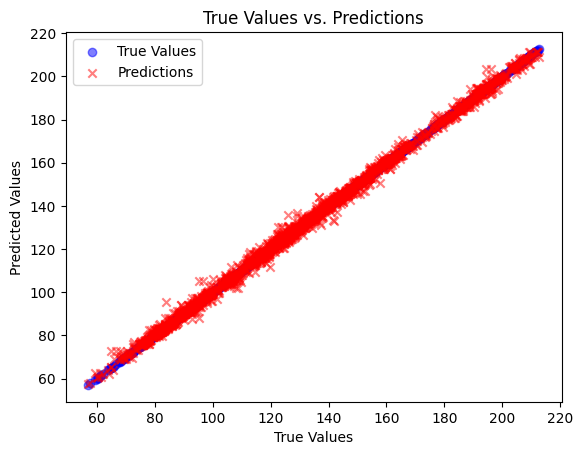

In [102]:
plt.scatter(y_test, y_test, label='True Values', c='blue', marker='o', alpha=0.5)
plt.scatter(y_test, predictions, label='Predictions', c='red', marker='x', alpha=0.5)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('True Values vs. Predictions')
plt.show()

In [113]:
# Retrieve data from the new API
api_key = 'P8PU8C9TQ3XW0PRI'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey={api_key}'
response = requests.get(url)
new_data = response.json()
print(new_data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'IBM', '3. Last Refreshed': '2023-10-09 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2023-10-09 19:55:00': {'1. open': '142.5000', '2. high': '142.5000', '3. low': '141.7800', '4. close': '141.7800', '5. volume': '99'}, '2023-10-09 19:50:00': {'1. open': '142.5000', '2. high': '142.5000', '3. low': '142.0300', '4. close': '142.0300', '5. volume': '12'}, '2023-10-09 19:45:00': {'1. open': '141.4500', '2. high': '141.4500', '3. low': '141.4500', '4. close': '141.4500', '5. volume': '2'}, '2023-10-09 19:40:00': {'1. open': '142.5000', '2. high': '142.5000', '3. low': '142.5000', '4. close': '142.5000', '5. volume': '3'}, '2023-10-09 19:15:00': {'1. open': '141.4500', '2. high': '141.4500', '3. low': '141.4500', '4. close': '141.4500', '5. volume': '25'}, '2023-10-09 19:00:00': {'1. open': '142.2000', '2. high': '

In [114]:
new_data = new_data['Time Series (5min)']
new_data = pd.DataFrame.from_dict(new_data, orient='index')
new_data.reset_index(inplace=True)
new_data.columns = ['Date','1. open', '2. high', '3. low', '4. close', '5. volume']

In [115]:
# Data preprocessing 
new_data['1. open'] = new_data['1. open'].astype(float)
new_data['4. close'] = new_data['4. close'].astype(float)
new_data['open_lag1'] = new_data['1. open'].shift(1)
new_data['close_lag1'] = new_data['4. close'].shift(1)
new_data['open_rolling_mean'] = new_data['1. open'].rolling(window=5).mean()
new_data['close_rolling_mean'] = new_data['4. close'].rolling(window=5).mean()
new_data['year'] = pd.to_datetime(new_data['Date']).dt.year
new_data['month'] = pd.to_datetime(new_data['Date']).dt.month
new_data['day'] = pd.to_datetime(new_data['Date']).dt.day
new_data = new_data.dropna()

In [116]:
# Extract features from the new data
new_features = new_data[features].values

# Scale the new data using the same StandardScaler
new_features = scaler.transform(new_features)

In [118]:
new_predictions = model.predict(new_features)

# Create a DataFrame to associate each data point with its prediction
predictions_df = pd.DataFrame({
    'Date': new_data['Date'],  # Assuming 'Date' is the identifier in your new data
    'Predicted_Open': new_predictions[:, 0],  # Assuming the first column of predictions is for 'open'
    'Predicted_Close': new_predictions[:, 1]  # Assuming the second column of predictions is for 'close'
})

3/3 [==============================] - 0s 11ms/step


In [119]:
predictions_df

,Date,Predicted_Open,Predicted_Close
4,2023-10-09 19:15:00,142.642990,142.557159
5,2023-10-09 19:00:00,141.804138,141.718964
6,2023-10-09 18:50:00,142.372147,142.287277
7,2023-10-09 18:45:00,142.369125,142.283157
8,2023-10-09 18:35:00,141.784592,141.699478
...,...,...,...
95,2023-10-09 10:15:00,141.397110,141.310303
96,2023-10-09 10:10:00,141.316177,141.229248
97,2023-10-09 10:05:00,141.452133,141.365570
98,2023-10-09 10:00:00,141.493744,141.407181


In [121]:
# Assuming you have the actual 'open' and 'close' values in your new_data DataFrame
actual_open = new_data['1. open'].values
actual_close = new_data['4. close'].values

# Calculate model predictions as you did before
new_predictions = model.predict(new_features)

# Calculate metrics for open and close
mse_open = mean_squared_error(actual_open, new_predictions[:, 0])  # Comparing the 'open' values
rmse_open = sqrt(mse_open)

mse_close = mean_squared_error(actual_close, new_predictions[:, 1])  # Comparing the 'close' values
rmse_close = sqrt(mse_close)

print("Open - Mean Squared Error (MSE):", mse_open)
print("Open - Root Mean Squared Error (RMSE):", rmse_open)

print("Close - Mean Squared Error (MSE):", mse_close)
print("Close - Root Mean Squared Error (RMSE):", rmse_close)


3/3 [==============================] - 0s 5ms/step
Open - Mean Squared Error (MSE): 0.11640596632018696
Open - Root Mean Squared Error (RMSE): 0.34118318586968344
Close - Mean Squared Error (MSE): 0.07311028102608541
Close - Root Mean Squared Error (RMSE): 0.2703891288977525


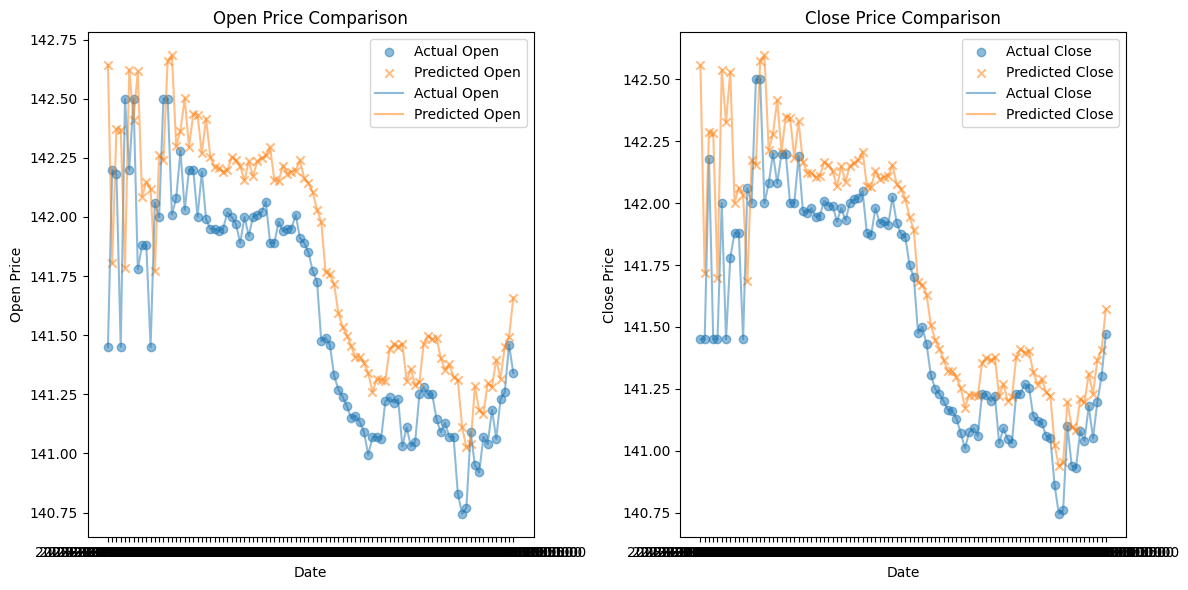

In [122]:
# Create scatter plots with lines connecting actual and predicted values
plt.figure(figsize=(12, 6))

# Open price comparison
plt.subplot(1, 2, 1)
plt.scatter(new_data['Date'], actual_open, label='Actual Open', marker='o', alpha=0.5)
plt.scatter(new_data['Date'], new_predictions[:, 0], label='Predicted Open', marker='x', alpha=0.5)
plt.plot(new_data['Date'], actual_open, label='Actual Open', alpha=0.5)
plt.plot(new_data['Date'], new_predictions[:, 0], label='Predicted Open', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Comparison')
plt.legend()

# Close price comparison
plt.subplot(1, 2, 2)
plt.scatter(new_data['Date'], actual_close, label='Actual Close', marker='o', alpha=0.5)
plt.scatter(new_data['Date'], new_predictions[:, 1], label='Predicted Close', marker='x', alpha=0.5)
plt.plot(new_data['Date'], actual_close, label='Actual Close', alpha=0.5)
plt.plot(new_data['Date'], new_predictions[:, 1], label='Predicted Close', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Comparison')
plt.legend()

plt.tight_layout()
plt.show()
